In [75]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('E:/Projects/Neural Net/Galaxy Zoo/Data/training_solutions_rev1/training_solutions_rev1.csv')

df.set_index('GalaxyID', inplace = True)

In [114]:
def read_image(DIR):
    while(True):
        inputs = []
        targets = []
        i = 0
        for img in os.listdir(DIR):
            if(len(inputs)!=0 and i>32):
                i = 0
                inputs = []
                targets = []
            im = cv2.imread(os.path.join(DIR,img))
            im = im[106:106*3,106:106*3,:]
            im = cv2.resize(im,(106,106), interpolation=cv2.INTER_CUBIC)
            ind = int(img[:-4])
            targets.append(df.loc[ind].values)
            inputs.append(im)
            i+=1
            if(i > 31):
                X_train = np.array(inputs)
                y_train = np.array(targets)
                X_train = X_train.reshape(len(X_train),106,106,3)
                y_train = y_train.reshape(len(y_train),37)
                yield(X_train,y_train)

In [115]:
DIR = "E:/Projects/Neural Net/Galaxy Zoo/Data/images_training_rev1/Train"
pan = read_image(DIR)

In [121]:
(X_train,y_train) = next(pan)

[[0.339372   0.649109   0.011518   ... 0.         0.         0.        ]
 [0.275971   0.700977   0.023052   ... 0.         0.         0.        ]
 [0.04243    0.95757    0.         ... 0.         0.         0.        ]
 ...
 [0.065374   0.934626   0.         ... 0.15047337 0.04402293 0.25697271]
 [0.475139   0.513016   0.011844   ... 0.         0.         0.        ]
 [0.077166   0.895607   0.027227   ... 0.         0.         0.4152232 ]]


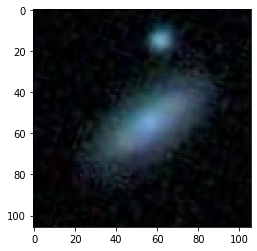

In [122]:
plt.imshow(X_train[0])
print(y_train)

In [123]:
for i in range(0,len(X_train)-1):
    print(np.array_equal(X_train[i],X_train[i+1]))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


[[0.339372   0.649109   0.011518   ... 0.         0.         0.        ]
 [0.275971   0.700977   0.023052   ... 0.         0.         0.        ]
 [0.04243    0.95757    0.         ... 0.         0.         0.        ]
 ...
 [0.065374   0.934626   0.         ... 0.15047337 0.04402293 0.25697271]
 [0.475139   0.513016   0.011844   ... 0.         0.         0.        ]
 [0.077166   0.895607   0.027227   ... 0.         0.         0.4152232 ]]


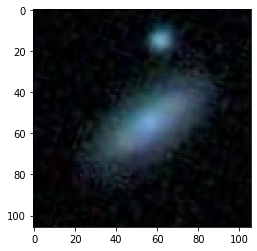

In [124]:
(X_train1,y_train1) = next(pan)
plt.imshow(X_train1[0])
print(y_train)

In [125]:
for i in range(0,len(X_train)-1):
    print(np.array_equal(X_train[i],X_train1[i]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [65]:
(X_train,y_train) = next(pan)
y_train.shape

(1, 37)